# 用opencv实现人脸识别

我们将要学习如何利用opencv准确的识别人脸。首先，我们简单的学习一下理论和基本的实现；接着，我们会用网络摄像头探测并记录人脸后记录到excel表格中做为一个出席会议的项目。人脸识别在初学者和在计算机视觉领域经验丰富的人中是一个很流行的话题。因为人脸识别在众多的应用中都非常有用。


理解问题:

尽管opencv的人脸识别算法已经被开发出来好多年了，但是算法的运行速度和准确率一直不能很好的配合。不过，最近的一些改进露出了曙光。Facebook是一个很好的例子，他们只需要训练少数的图片就能够标记你和你的朋友，并且准确率高达98%。这是如何实现的呢，我们今天将使用Adam Geitgey开发的人脸识别库来复现类似的结果。让我们先看看他在论文（ https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78 ）中解释的四个问题。

人脸识别是若干问题组成的：

1、首先，查看一张图片并找到上面所有的人脸

2、第二，聚焦于不同的脸，即便这张脸有偏转的方向或不正常的光照，也能识别出这是同一个人

3、第三，能够从脸上找到唯一的特征来区别于其他的脸----比如眼睛的大小，脸的长度等

4、最后，根据这张脸唯一的特征和你已知的所有人脸来确定其名字

注：参考英文连接：https://www.murtazahassan.com/face-recognition-opencv/

联系我：lengkujiaai@126.com

# 第一步：读取并显示图片

引入相关模块

plt显示的图片颜色不正常，将就看吧

In [2]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ejwicqw3 because the default path (/home/jetbot/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


读取Elon-Musk的照片并将BGR格式转换成RGB格式。人脸识别包中有个加载图片的函数，被引入的图片必须是RGB格式的。

In [3]:
imgElon = face_recognition.load_image_file('image/Elon-Musk.jpg')
imgElon = cv2.cvtColor(imgElon, cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file('image/Elon-Test.jpg')
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

显示用来检测的图片

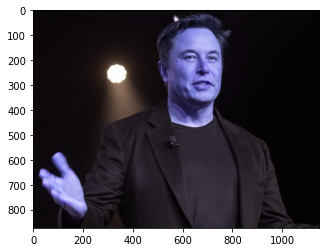

In [4]:
plt.imshow(imgTest)
plt.show()

显示原图

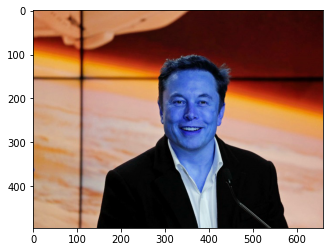

In [5]:
plt.imshow(imgElon)
plt.show()

# 第二步：标识人脸

在第二步，将使用人脸识别库的真正功能。首先发现图片中所有的人脸，这个通过在后端运行HOG实现。找到人脸后，变换成需要角度的图片。接着把这张图片送给预训练的神经网络，该网络会输出128个参数作为人脸的唯一标识。这些参数是模型在训练时自己学习的，所以我也不知道参数的具体含义。庆幸的是这些工作只需要两行代码。我们有了脸的位置信息和编码参数，就可以用矩形把脸框起来。


找到原图中人脸的位置并对人脸编码

In [6]:
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]

画出人脸的位置并显示

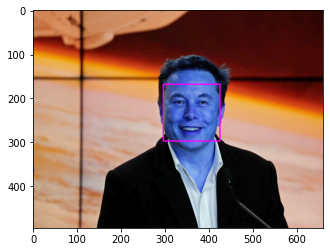

In [7]:
cv2.rectangle(imgElon, (faceLoc[3],faceLoc[0]), (faceLoc[1],faceLoc[2]),(255, 0, 255), 2)

plt.imshow(imgElon)
plt.show()

找到测试图片中的人脸并对人脸编码

In [8]:
faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]

框出人脸的位置并显示

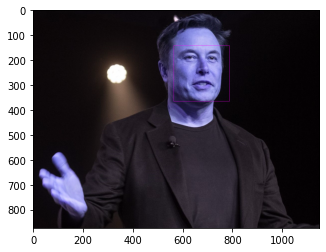

In [9]:
cv2.rectangle(imgTest, (faceLocTest[3],faceLocTest[0]), (faceLocTest[1], faceLocTest[2]),(255,0,255))
plt.imshow(imgTest)
plt.show()

# 第三步：比较人脸

有个两张脸的编码参数后，就可以通过比较这两张脸的128个参数来发现相似性。用最常用的机器学习方法中的线性SVM分类器来比较这些参数。可以用compare_faces函数来计算人脸的相似性，该函数会返回True或False。同理，可以用face_distance函数来计算某张脸和其他脸的相似性。当有很多脸需要比较时，这个就很有用。

得到比较人脸的结果（True或False）并计算测试图片和原图的差距

In [10]:
results = face_recognition.compare_faces([encodeElon], encodeTest)
faceDis = face_recognition.face_distance([encodeElon], encodeTest)

框出人脸并显示结果

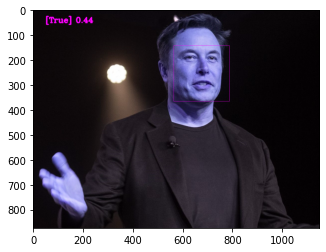

In [11]:
cv2.putText(imgTest, f'{results} {round(faceDis[0],2)}', (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(255,0,255),3)
plt.imshow(imgTest)
plt.show()

如果运行测试图片，会得到返回值True,提示发现了人脸 Elon Musk。比较人脸的差距是0.44，差距越小，相似度越高。

# 加载盖茨的照片并转换成RGB格式

In [12]:
imgGates = face_recognition.load_image_file('image/Shi-Hailong.jpg')
imgGates = cv2.cvtColor(imgGates, cv2.COLOR_BGR2RGB)

face_locations: 找到人脸的位置

face_encodings: 对人脸进行编码

In [13]:
faceLocTest = face_recognition.face_locations(imgGates)[0]
encodeTest = face_recognition.face_encodings(imgGates)[0]

输出人脸的坐标看一下

In [14]:
print(faceLocTest)

(206, 419, 527, 98)


看看人脸编码后的效果

In [15]:
print(encodeTest)

[-0.10628194  0.10425041  0.09150051  0.02366525 -0.04705986 -0.080954
 -0.05750479 -0.14620861  0.08115348 -0.09866498  0.16766402 -0.11219753
 -0.18274207 -0.0562523  -0.05386729  0.18470544 -0.1310142  -0.07550208
 -0.02324753 -0.03209573  0.08201487  0.01056724 -0.02258413  0.01325122
 -0.05934181 -0.29697579 -0.13771574 -0.06458923 -0.02080507 -0.02459212
 -0.07776244  0.01748696 -0.140975   -0.09033298  0.02265305  0.07099564
 -0.02949537 -0.08881802  0.16347778 -0.03840743 -0.13268733 -0.0232194
  0.08502129  0.21414192  0.13262558  0.1262133   0.02286642 -0.10562475
  0.08089328 -0.1890016   0.04424141  0.08407097  0.0627318   0.09560955
  0.0092772  -0.1297842   0.06490412  0.08577745 -0.14040703  0.02397457
  0.08398587 -0.12663582 -0.02023763  0.00291307  0.29670429  0.12401779
 -0.07749221 -0.08173756  0.14927277 -0.14222343 -0.09012786 -0.05757489
 -0.07451107 -0.15685064 -0.28734615  0.05324636  0.41232777  0.12937945
 -0.19156486  0.0605211  -0.03430588  0.00140024  0.21

将测试照片的编码和原有图片的编码比对

In [16]:
results = face_recognition.compare_faces([encodeElon], encodeTest)
faceDis = face_recognition.face_distance([encodeElon], encodeTest)

In [17]:
print('results: ', results)
print('faceDis: ', faceDis)

results:  [False]
faceDis:  [0.76629285]


把比对结果放到图片上显示

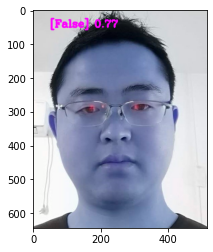

In [18]:
cv2.putText(imgGates, f'{results} {round(faceDis[0],2)}', (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(255,0,255),3)
plt.imshow(imgGates)
plt.show()

换成另外一张测试图片，这次是用的Bill Gates。可以看到结果是False，差距比之前高很多说明匹配的不好。

# 结论

在本小节中我们共进行了三步：

1、读取并显示图片

2、找到并标识人脸在图片中的位置

3、比对不同人的照片，同一个人给出True，不同的人给出False